In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("data/fcc-forum-pageviews.csv", index_col = "date", parse_dates = ["date"])


df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]

In [2]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize = (15, 5))
    
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    
    ax.set_ylabel('Views')
    ax.set_xlabel('Date')
    
    ax.plot(df.index, df["value"], color = "crimson", linewidth = 1.5)
    
    return plt.show()

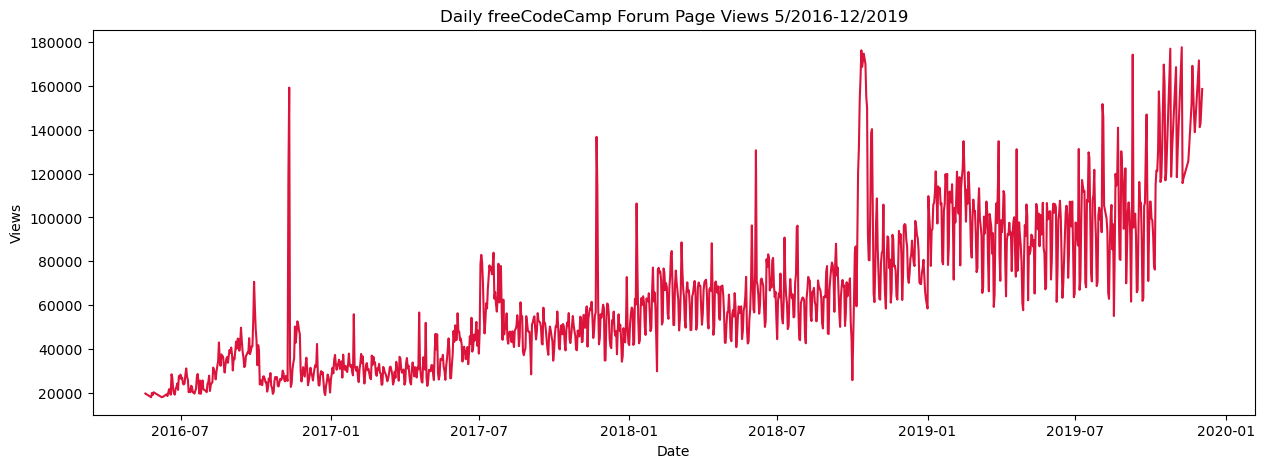

In [3]:
draw_line_plot()

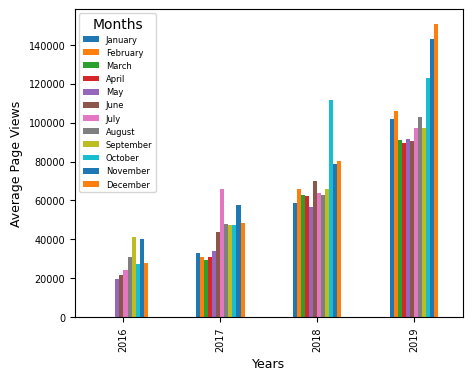

In [4]:
df = pd.read_csv("data/fcc-forum-pageviews.csv", parse_dates = ["date"])

# clean data
df = df[(df["value"] >= df["value"].quantile(0.025)) & 
        (df["value"] <= df["value"].quantile(0.975))]

df_piv = df.pivot_table(index =  df["date"].dt.year, 
                    columns = df["date"].dt.month_name(), 
                    values = "value", 
                    aggfunc = "mean")

df_piv = df_piv[["January", "February", "March", 
         "April", "May", "June", "July", 
         "August", "September", "October", 
         "November", "December"]]

ax = df_piv.plot(kind = "bar", figsize = (5, 4), fontsize = 7)


# ax.plot(kind = 'bar', data = df_piv.index)
ax.set_ylabel("Average Page Views", fontsize = 9)
ax.set_xlabel("Years", fontsize = 9)
ax.legend(fontsize = 6, title = "Months")



In [5]:
df = pd.read_csv("data/fcc-forum-pageviews.csv", parse_dates = ["date"])
      
# Clean data
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]

df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [6]:
df_box

,index,date,value,year,month
0,10,2016-05-19,19736,2016,May
1,17,2016-05-26,18060,2016,May
2,18,2016-05-27,19997,2016,May
3,19,2016-05-28,19044,2016,May
4,20,2016-05-29,20325,2016,May
...,...,...,...,...,...
1233,1294,2019-11-24,138875,2019,Nov
1234,1299,2019-11-29,171584,2019,Nov
1235,1300,2019-11-30,141161,2019,Nov
1236,1301,2019-12-01,142918,2019,Dec


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

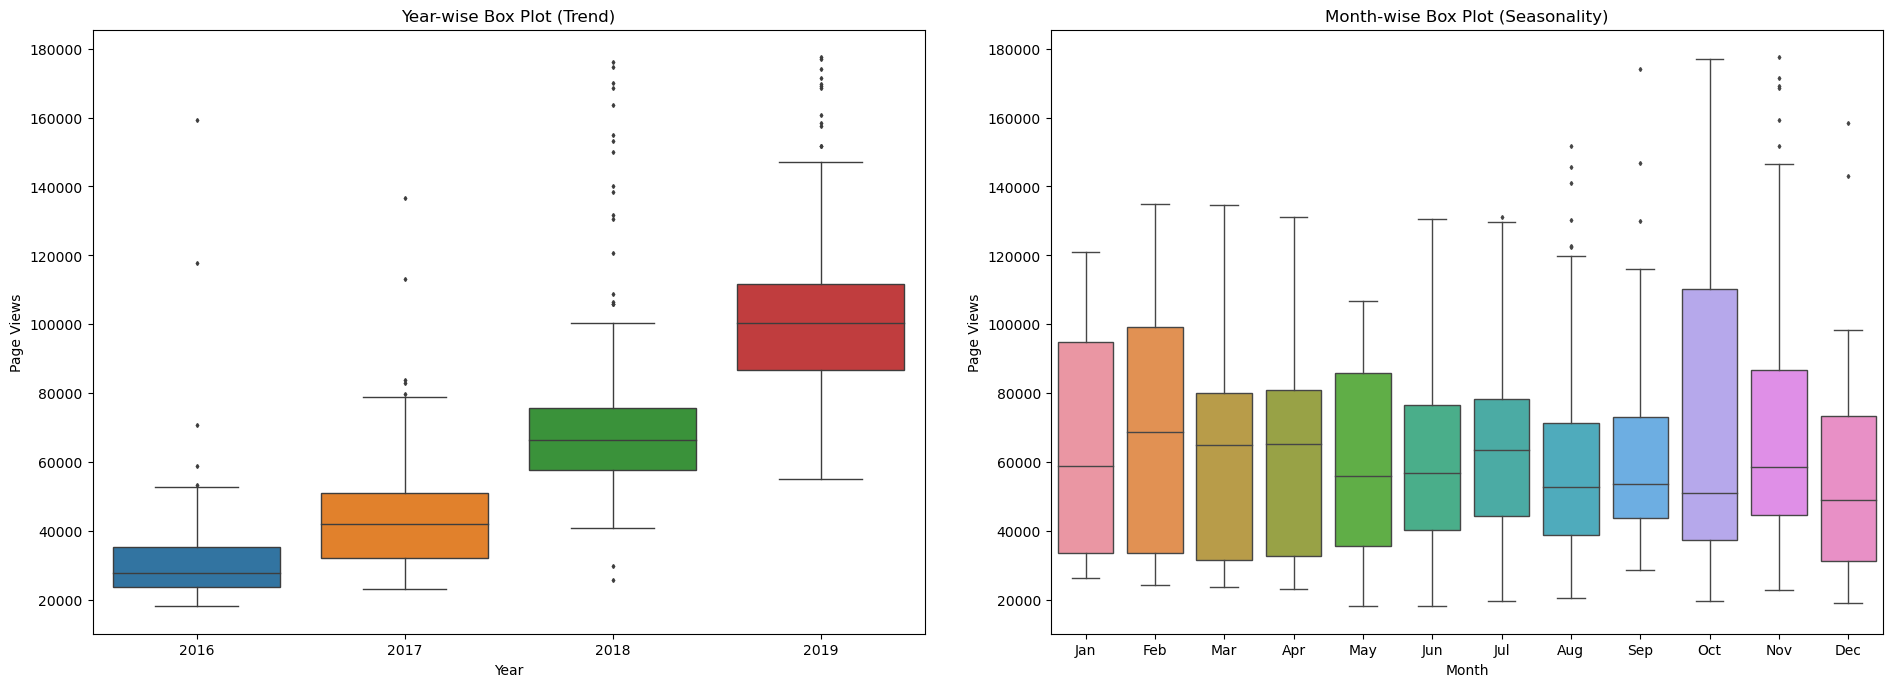

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (20, 8))

fig.tight_layout(pad = 6)

sns.boxplot(data = df_box, x = "year", y = "value", ax = axs[0], linewidth = 1, fliersize = 2)
axs[0].set_ylabel("Page Views")
axs[0].set_xlabel("Year")
axs[0].set_title("Year-wise Box Plot (Trend)")

sns.boxplot(data = df_box, x = "month", y = "value", ax = axs[1], linewidth = 1, fliersize = 2, order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
axs[1].set_ylabel("Page Views")
axs[1].set_xlabel("Month")
axs[1].set_title("Month-wise Box Plot (Seasonality)")

